# Machine Learning - Assignment 3

## Artificial Neural Network

The aim of the assignment is to implement an artificial neural network (mostly) from scratch. This includes implementing or fixing the following:

* Add support for additional activation functions and their derivatives.
* Add support for loss functions and their derivative.
* Add the use of a bias in the forward propagation.
* Add the use of a bias in the backward propagation.

In addition, you will be doing the following as well:

* Test the algorithm on 3 datasets.
* Compare neural networks with and without scaling.
* Hyper-parameter tuning.

The forward and backward propagation is made to work through a single layer, and are re-used multiple times to work for multiple layers.

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the implementation.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, you might find yourself going back and and forth to change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries.

**IMPORTANT NOTE:** You may not import any more libraries than the ones already imported!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# We set seed to better reproduce results later on.
np.random.seed(12345)

## Neural Network utility functions

### 1) Activation functions

Below is some setup for choosing activation function. Implement 2 additional activation functions, "ReLU" and one more of your choosing.

In [2]:
def relu(activations):
    return np.maximum(0, activations)

In [3]:
def sigmoid(activations):
	return np.divide(1, np.add(1, np.exp(-activations)))

In [4]:
def tanh(activations):
    return np.divide(np.subtract(np.exp(activations), np.exp(-activations)), np.add(np.exp(activations), np.exp(-activations)))

In [5]:
def isrlu(activations, alpha = 1):
    return np.where(np.greater_equal(activations, 0), activations, np.divide(activations, np.sqrt(np.add(1, np.multiply(alpha, np.square(activations))))))

In [6]:
def softmax(activations):
    exponents = np.exp(activations - np.max(activations, axis=1, keepdims=True))
    return exponents / np.sum(exponents, axis=1, keepdims=True)

In [7]:
# Activation functions
def activate(activations, selected_function = "None"):
    # if selected function is "None"
    y = activations
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" activation function
        y = relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement another activation function activation function of your own choice.
        y = sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement another activation function activation function of your own choice.
        y = tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement another activation function activation function of your own choice.
        y = isrlu(activations)
    elif selected_function == "Softmax":
        y = softmax(activations)
    return y

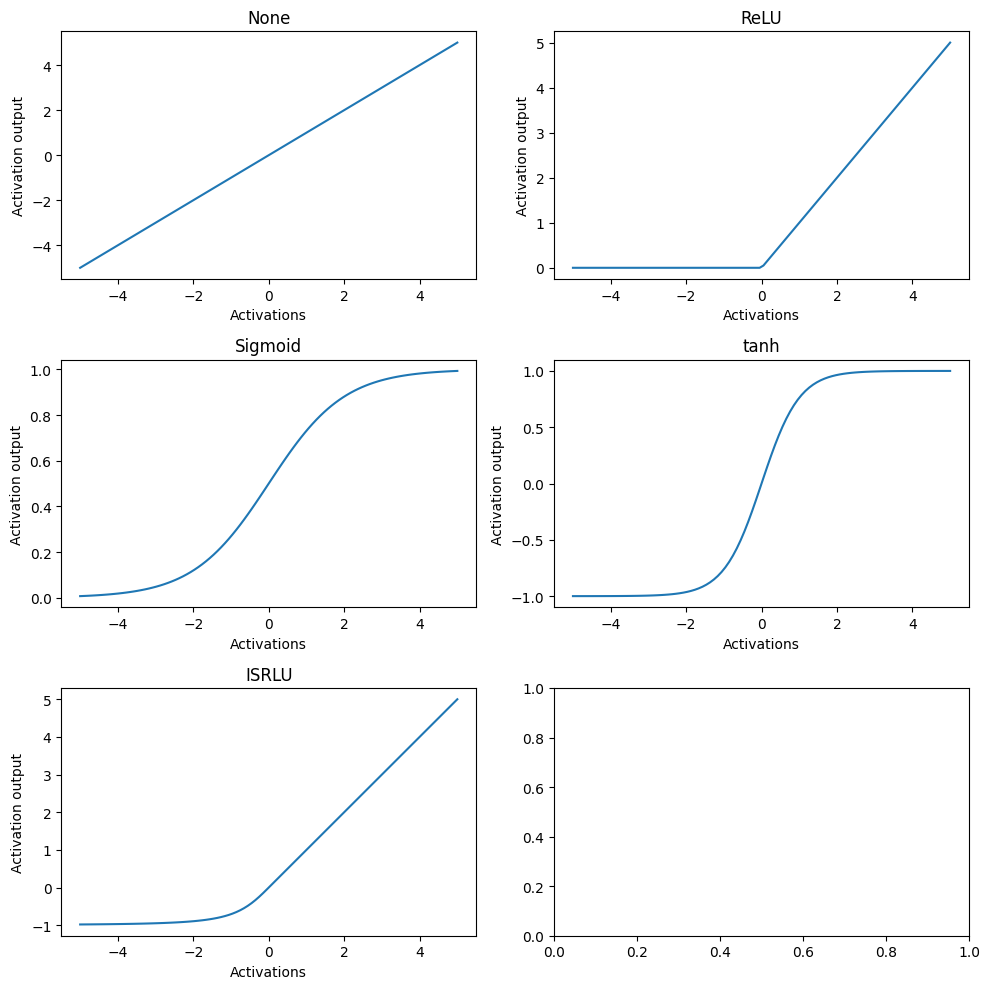

In [8]:
# TODO Test your activation functions, is the returning values what you expect?
activations = np.linspace(-5, 5, 100)
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 2) Activation function derivatives

Neural networks need both the activation function and its derivative. Finish the code below.

In [9]:
def d_relu(activations):
    return (activations > 0).astype(activations.dtype)

In [10]:
def d_sigmoid(activations):
    return np.multiply(sigmoid(activations), np.subtract(1, sigmoid(activations)))

In [11]:
def d_tanh(activations):
    return np.subtract(1, np.square(tanh(activations)))

In [12]:
def d_isrlu(activations):
    return np.where(np.greater_equal(activations, 0), 1, np.float_power(isrlu(activations), 3))

In [13]:
def d_activate(activations, selected_function = "None"):
    # if selected function is "None or Softmax"
    dy = np.ones_like(activations)
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" derivative
        dy = d_relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_isrlu(activations)

    return dy

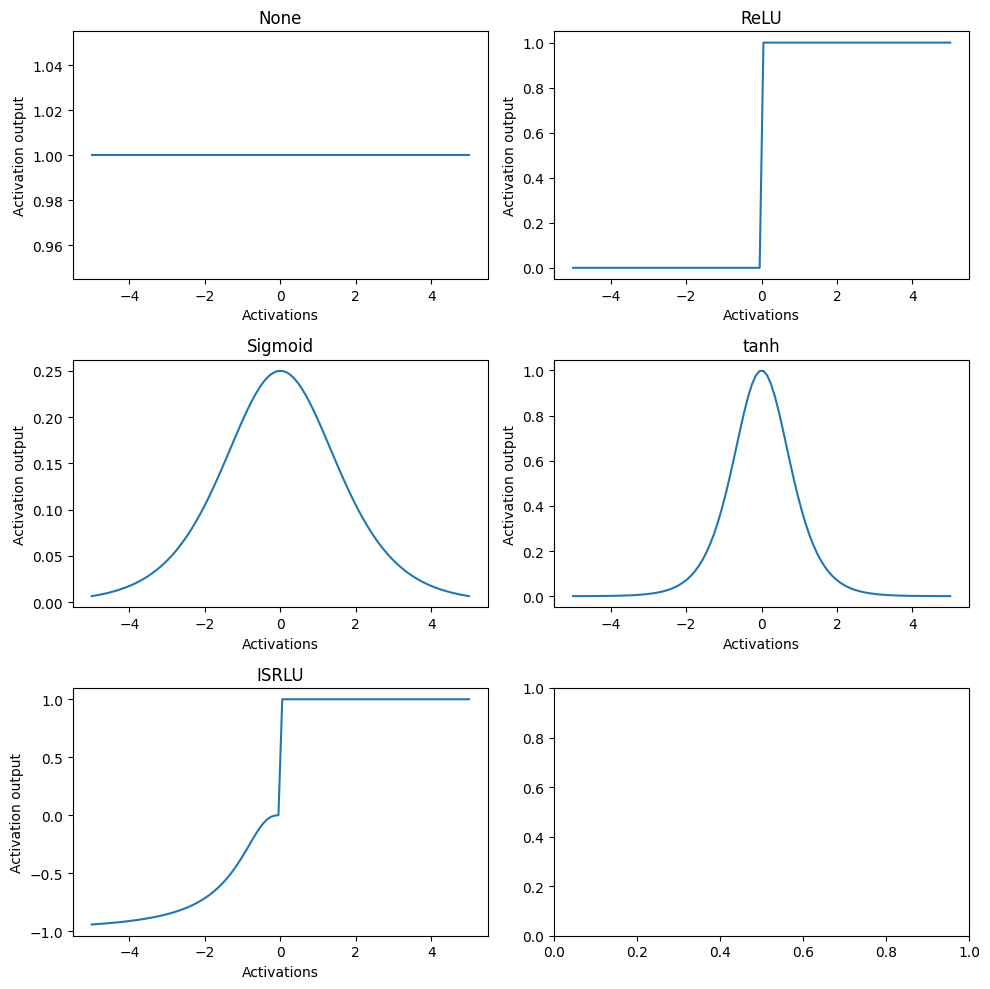

In [14]:
# TODO Test your activation function derivatives, is the returning values what you expect?
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = d_activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 3) Loss functions

To penalize the network when it predicts incorrect, we need to meassure how "bad" the prediction is. This is done with loss-functions.

Similar as with the activation functions, the loss function needs its derivative as well.

Finish the MSE_loss (Mean Squared Error loss), as well as adding one additional loss function.

In [15]:
# This is the loss for a set of predictions y_hat compared to a set of real values y
def MSE_loss(y_hat, y):
    loss = np.mean(np.square(np.subtract(y_hat, y))) # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def CCE_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-12, 1)
    loss = -np.mean(np.sum(y * np.log(y_hat), axis=1))
    return loss

# TODO: Choose another loss function and implement it
def BCE_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-12, 1 - 1e-12)
    loss = -np.mean(np.add(np.multiply(y, np.log(y_hat)), np.multiply((np.subtract(1, y)), np.log(np.subtract(1, y_hat)))))  # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def SCE_loss(y_hat, y):
    size = y_hat.shape[0]
    y_hat = np.clip(y_hat, 1e-12, 1)
    y = y.astype(int)
    loss = -np.mean(
        np.log(y_hat[np.arange(size), y.ravel()])
    )  # TODO: Finish this function
    return loss

The derivatives of the loss is with respect to the predicted value **y_hat**.

In [16]:
def d_MSE_loss(y_hat, y):
    # TODO: Finish this function
    dy = np.multiply(2, np.divide(np.subtract(y_hat, y), y.shape[0]))
    return dy

# TODO: Choose another loss function and implement it
def d_CCE_loss(y_hat, y):
    dy = (y_hat - y) / y.shape[0]
    return dy

# TODO: Choose another loss function and implement it
def d_BCE_loss(y_hat, y):
    # TODO: Finish this function
    y_hat = np.clip(y_hat, 1e-12, 1 - 1e-12)
    dy = np.add(-np.divide(y, y_hat), np.divide(np.subtract(1, y), np.subtract(1, y_hat)))
    dy = np.divide(dy, y.shape[0])
    return dy

# TODO: Choose another loss function and implement it
def d_SCE_loss(y_hat, y):
    n = y_hat.shape[0]
    grad = y_hat.copy()
    one_hot = np.zeros_like(y_hat)
    y = y.astype(int)
    one_hot[np.arange(n), y.ravel()] = 1
    dy = (grad - one_hot) / n
    return dy

### 4) Forward propagation

The first "fundamental" function for neural networks is to be able to propagate the data forward through the neural network. We will implement this function here.

In [17]:
def propagate_forward(weights, activations, bias, activation_function="None"):
    # TODO: Add support for the use of bias
    dot_product = np.dot(activations, weights) + bias
    new_activations = activate(dot_product, activation_function)
    return new_activations

### 5) Back-propagation

To be able to train a neural network, we need to be able to propagate the loss backwards and update the weights. We will implement this function here.

In [18]:
# Calculates the backward gradients that are passed throughout the layer in the backward pass.
# Returns both the derivative of the loss in respect to the weights and the input signal (activations).

def propagate_backward(weights, activations, dl_dz, bias, activation_function="None"):
    # NOTE: dl_dz is the derivative of the loss based on the previous layers activations/outputs
    # TODO: Add support for the use of bias
    dot_product = np.dot(activations, weights) + bias
    d_loss = d_activate(dot_product, activation_function) * dl_dz
    d_weights = np.dot(activations.T, d_loss)
    d_activations = np.dot(d_loss, weights.T)
    d_bias = np.sum(d_loss, axis=0, keepdims=True)
    return d_weights, d_activations, d_bias

## Neural network implementation

### 6) Fixing the neural network

Below is a class implementation of a MLP neural network. This implementation is still lacking several areas that are needed for the network to be robust and function well. Your task is to improve and fix it with the following:

1. Add a bias to the activation functions, and make sure the bias is also updated during training. 
2. Add a function that trains the network using minibatch (such that the neural network trains on a few samples at a time). 
3. Make use of an validation set in the training function. The model should stop training when the loss starts to increase for the validatin set. This feature should be able to be turned on and off to test the difference.


In [19]:
class NeuralNet(object):
    # Setup all parameters and activation functions.
    # This function runs directly when a new instance of this class is created.
    def __init__ (self, input_dim, output_dim, neurons = [], loss_function="MSE", output_activation="None"):

        # NOTE: The "neurons" parameter is given as a list.
        # E.g., [4, 8, 4] means 4 neurons in layer 1, 8 neurons in layer 2 etc...

        # TODO: Add support for bias for each neuron in the code below.
        self.weights = [np.random.normal(0,2,(n,m)) for n,m in zip([input_dim] + neurons, neurons + [output_dim])]
        self.activation_functions = ["ReLU"] * len(neurons) + [output_activation]
        self.biases = [np.zeros((1, n)) for n in (neurons + [output_dim])]
        self.loss_function = loss_function

    # Predict the input throughout the network and calculate the output.
    def forward(self, x):

        # TODO: Add support for a bias for each neuron in the code below.
        for layer_weights, layer_bias, layer_activation_function in zip(
            self.weights,
            self.biases,
            self.activation_functions,
        ):
            x = propagate_forward(layer_weights, x, layer_bias, layer_activation_function)

        return x

    # Adjust the weights in the network to better fit the desired output (y), given the input (x).
    # The weight updates are happening "in-place", thus we are only returning the loss from this function.
    # Note that this function can handle a variable size of the input (x), both full datasets or smaller parts of the dataset.
    def adjust_weights(self, x, y, learning_rate=1e-4):

        # TODO: Add support for a bias for each neuron and make sure these are learnt as well in the code below.

        activation = x
        activation_history = [] # NOTE: We need the previous (or intermediate) activations to make use of the "chain rule" (see lecture notes).

        for layer_weights, layer_bias, layer_activation_function in zip(self.weights, self.biases, self.activation_functions):
            activation_history.append(activation)
            activation = propagate_forward(layer_weights, activation, layer_bias, layer_activation_function)

        # NOTE: The "activation" variable is changing as we go forward in the neural network.

        if self.loss_function == "MSE":
            loss = MSE_loss(activation,y)
            d_activations = d_MSE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "BCE":
            loss = BCE_loss(activation,y)
            d_activations = d_BCE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "CCE":
            loss = CCE_loss(activation, y)
            d_activations = d_CCE_loss(
                activation, y
            )  # NOTE: The final output can be "seen as" the final activations, thus the name.
        elif self.loss_function == "SCE":
            loss = SCE_loss(activation, y)
            d_activations = d_SCE_loss(
                activation, y
            )  # NOTE: The final output can be "seen as" the final activations, thus the name.

        for i, (
            layer_weights,
            layer_bias,
            layer_activation_function,
            previous_activations,
        ) in reversed(
            list(
                enumerate(
                    zip(
                        self.weights,
                        self.biases,
                        self.activation_functions,
                        activation_history,
                    )
                )
            )
        ):

            d_weights, d_activations, d_bias = propagate_backward(layer_weights, previous_activations, d_activations, layer_bias, layer_activation_function)

            # NOTE: Here is where the weight update is happening.
            self.weights[i] = layer_weights - learning_rate * d_weights
            self.biases[i] = layer_bias - learning_rate * d_bias

        return loss

    # A function for the training of the network.
    def train_net(self, x, y, batch_size=32, epochs=100, learning_rate=1e-4, use_validation_data=False, early_stopping=3):
        losses = []
        accuracies = []
        # TODO: Add a training loop where the weights and biases of the network is learnt over several epochs.
        best_val_loss = float("inf")
        early_stop_cnt = 0
        if use_validation_data:
            X_train = x[: int(x.shape[0] * 0.8), :]
            y_train = y[: int(y.shape[0] * 0.8), :]

            X_val = x[X_train.shape[0] :]
            y_val = y[y_train.shape[0] :]
        else:
            X_train, y_train = x, y
        size = X_train.shape[0]
        for epoch in range(epochs):
            # TODO: Add support for mini batches. That is, in each epoch the data should be split into several
            #       smaller subsets and the model should be trained on each of these subsets one at a time.
            shuffle_idx = np.random.permutation(size)
            X_train = X_train[shuffle_idx, :]
            y_train = y_train[shuffle_idx, :]
            loss = 0
            accuracy = 0

            num_batches = X_train.shape[0] // batch_size

            X_batches = [
                X_train[i * batch_size : (i + 1) * batch_size]
                for i in range(num_batches)
            ]
            y_batches = [y_train[i * batch_size:(i + 1) * batch_size] for i in range(num_batches)]

            if X_train.shape[0] % batch_size != 0:
                X_batches = X_batches[:-1]
                y_batches = y_batches[:-1]

            for X_batch, y_batch in zip(X_batches, y_batches):
                loss += self.adjust_weights(X_batch, y_batch, learning_rate)
                y_pred = self.forward(X_batch)
                correct_pred = np.sum(y_batch.ravel() == np.argmax(y_pred, axis=1))
                accuracy += (correct_pred / y_batch.shape[0])

            losses.append(loss / num_batches)
            accuracies.append(accuracy / num_batches)
            print(f"Epoch {epoch + 1} - Loss: {losses[epoch]}")
            if use_validation_data:
                # TODO: Implement the use of validation data, that is, splitting the training data into training data and validation data.
                #       The validation data should be used to stop the training when the model stops to generalize and starts to overfit.
                #       This feature should be able to be turned on and off to test the difference.
                y_val_pred = self.forward(X_val)
                if self.loss_function == "MSE":
                    val_loss = MSE_loss(y_val_pred, y_val)
                elif self.loss_function == "BCE":
                    val_loss = BCE_loss(y_val_pred, y_val)
                elif self.loss_function == "CCE":
                    val_loss = CCE_loss(y_val_pred, y_val)
                elif self.loss_function == "SCE":
                    val_loss = SCE_loss(y_val_pred, y_val)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    early_stop_cnt = 0
                else:
                    early_stop_cnt += 1
                    if early_stop_cnt == early_stopping:
                        print(
                            f"### EARLY STOP - Validation loss did not improve for {early_stopping} epochs! ###"
                        )
                        return losses, accuracies
        # NOTE: Make use of previously implemented functions here.
        return losses, accuracies

## Train Neural Networks

### 7) Simple test

In this a very simple test for you to use and toy around with before using the datasets.

Make sure to test both the **adjust_weights** function and the **train_net** function. What is the difference between the two?

Also, be sure to **plot the loss for each epoch** to see how the network training is progressing!

Start Loss: 31365.825846180418 End Loss: 9.23322005255899

Epoch 1 - Loss: 2748.6299245693594
Epoch 2 - Loss: 195.90507357623704
Epoch 3 - Loss: 142.83366630191298
Epoch 4 - Loss: 117.75897329912577
Epoch 5 - Loss: 102.49074398524318
Epoch 6 - Loss: 88.73177975025014
Epoch 7 - Loss: 80.53732371095245
Epoch 8 - Loss: 72.37733483763932
Epoch 9 - Loss: 65.50559248806262
Epoch 10 - Loss: 60.197720416061095
Epoch 11 - Loss: 55.41402046464796
Epoch 12 - Loss: 52.00978854058419
Epoch 13 - Loss: 47.90903952687406
Epoch 14 - Loss: 45.10716384328734
Epoch 15 - Loss: 42.12679368122874
Epoch 16 - Loss: 39.687684148809474
Epoch 17 - Loss: 37.657598027875316
Epoch 18 - Loss: 35.786886087611634
Epoch 19 - Loss: 33.86600224555164
Epoch 20 - Loss: 31.82946398025254
Epoch 21 - Loss: 31.127228970617715
Epoch 22 - Loss: 29.378866320258748
Epoch 23 - Loss: 28.724281547493405
Epoch 24 - Loss: 27.27779486571477
Epoch 25 - Loss: 25.97600581449984
Epoch 26 - Loss: 25.571044700184288
Epoch 27 - Loss: 24.4169235

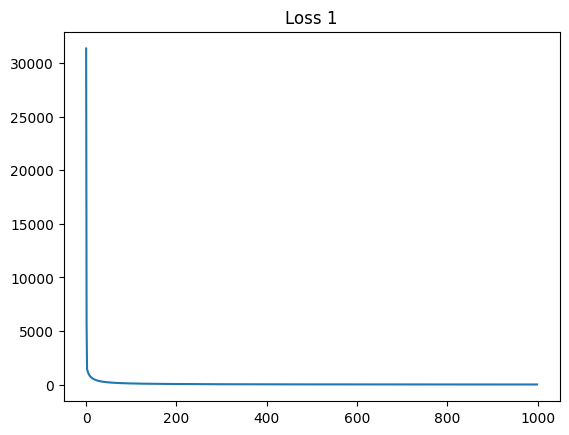

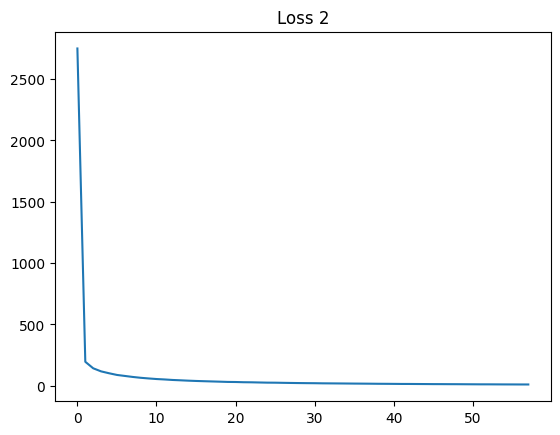

In [20]:
# TODO: You can change most things in this cell if you want to, we encourage it!

n = 1000
d = 4

k = np.random.randint(0,10,(d,1))
x = np.random.normal(0,1,(n,d))
y = np.dot(x,k) + 0.1 + np.random.normal(0,0.01,(n,1))

nn = NeuralNet(d, 1, [18, 12])

loss_1 = [nn.adjust_weights(x, y) for _ in range(1000)] 
print(f"Start Loss: {loss_1[0]} End Loss: {loss_1[-1]}\n")

nn2 = NeuralNet(d, 1, [18, 12])

loss_2, accuracies = nn2.train_net(
    x, y, epochs=100, use_validation_data=True, early_stopping=5
)  # TODO: Use the train_net function to compare with the "adjust_weights" function.

plt.plot(loss_1)
plt.title("Loss 1")
plt.show()

plt.plot(loss_2)
plt.title("Loss 2")
plt.show()

### Real test and preprocessing

When using real data and neural networks, it is very important to scale the data between smaller values, usually between 0 and 1. This is because neural networks struggle with larger values as input compared to smaller values. 

To test this, we will use our first dataset and test with and without scaling.

Similar as with assignment 2, we will use the scikit-learn library for this preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

### 8) Dataset 1: Wine - with and without scaling

Wine dataset: https://archive.ics.uci.edu/dataset/109/wine

Train two neural network, one with scaling and one without. Are we able to see any difference in training results or loss over time?

**Note:** Do not train for to many epochs (more than maybe 50-100). The network might "learn" anyway in the end, but you should still be able to see a difference when training.

Neural Net 1:
Epoch 1 - Loss: 7.041232014261384
Epoch 2 - Loss: 0.9395194447837155
Epoch 3 - Loss: 0.9378350282764847
Epoch 4 - Loss: 0.9388397207531014
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Neural Net 2:
Epoch 1 - Loss: 20.177968329410444
Epoch 2 - Loss: 18.592791977114143
Epoch 3 - Loss: 18.429299056494365
Epoch 4 - Loss: 16.929760408893905
Epoch 5 - Loss: 14.805597981368923
Epoch 6 - Loss: 11.315584336560196
Epoch 7 - Loss: 9.71511217094535
Epoch 8 - Loss: 8.340105329233891
Epoch 9 - Loss: 7.1742282748456665
Epoch 10 - Loss: 7.2185829393014105
Epoch 11 - Loss: 5.48224591011937
Epoch 12 - Loss: 6.239974325814798
Epoch 13 - Loss: 4.186235285577904
Epoch 14 - Loss: 4.154687617414006
Epoch 15 - Loss: 4.147890599194574
Epoch 16 - Loss: 3.65191883294279
Epoch 17 - Loss: 3.7433610824932972
Epoch 18 - Loss: 2.646611952587119
Epoch 19 - Loss: 2.9428496353143254
Epoch 20 - Loss: 2.9758695982602226
Epoch 21 - Loss: 3.004175889416579
### EARLY STOP - Validation loss

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7 - Loss: 6.8919007472086795
Epoch 8 - Loss: 7.36000945059328
Epoch 9 - Loss: 6.801093066612881
Epoch 10 - Loss: 5.763483310265826
Epoch 11 - Loss: 5.623937816876512
Epoch 12 - Loss: 5.973473714107036
Epoch 13 - Loss: 6.172413375636789
Epoch 14 - Loss: 5.548648461778382
Epoch 15 - Loss: 5.120627025865986
Epoch 16 - Loss: 4.401230752136093
Epoch 17 - Loss: 4.159883996598479
Epoch 18 - Loss: 4.266337311428311
Epoch 19 - Loss: 4.2765688104409945
Epoch 20 - Loss: 3.819902358862738
Epoch 21 - Loss: 3.5113513397726313
Epoch 22 - Loss: 3.4922937081445036
Epoch 23 - Loss: 3.3560533313728924
Epoch 24 - Loss: 3.8581340520621445
Epoch 25 - Loss: 3.824138619834759
Epoch 26 - Loss: 3.867087418264208
Epoch 27 - Loss: 3.017446096199682
Epoch 28 - Loss: 2.638472501979247
Epoch 29 - Loss: 3.4355034574877505
Epoch 30 - Loss: 3.195987949292598
Epoch 31 - Loss: 3.11158128870298
Epoch 32 - Loss: 3.069636563928255
Epoch 33 - Loss: 3.2277480623725787
### EARLY STOP - Validation loss did not improve for

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2 - Loss: 15.138553264618228
Epoch 3 - Loss: 15.27788495797916
Epoch 4 - Loss: 13.164098734644393
Epoch 5 - Loss: 12.262384439297909
Epoch 6 - Loss: 11.455218421026578
Epoch 7 - Loss: 11.655527522420533
Epoch 8 - Loss: 9.71603771113766
Epoch 9 - Loss: 7.789037636657322
Epoch 10 - Loss: 8.733800692587408
Epoch 11 - Loss: 7.868396358861446
Epoch 12 - Loss: 6.269201589097234
Epoch 13 - Loss: 5.923209537530018
Epoch 14 - Loss: 5.097103140278425
Epoch 15 - Loss: 4.328355800328432
Epoch 16 - Loss: 4.286379797528423
Epoch 17 - Loss: 3.7974123405589677
Epoch 18 - Loss: 4.0442339298537915
Epoch 19 - Loss: 3.737299061856127
Epoch 20 - Loss: 2.8386698333057963
Epoch 21 - Loss: 3.064941064418437
Epoch 22 - Loss: 2.422234357143096
Epoch 23 - Loss: 2.4953571271379205
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy Neural Net 1: 0.3888888888888889
Accuracy Neural Net 2: 0.6944444444444444
Accuracy of sklearn's MLPClassifier: 0.3888888888888889
Accuracy of sklearn's M

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19 - Loss: 0.9363364299768353
Epoch 20 - Loss: 0.9371865524560751
Epoch 21 - Loss: 0.9350219229023783
Epoch 22 - Loss: 0.9356847253739726
Epoch 23 - Loss: 0.9320390661338706
Epoch 24 - Loss: 0.9318774615925769
Epoch 25 - Loss: 0.9313163456196261
Epoch 26 - Loss: 0.9324965084650995
Epoch 27 - Loss: 0.9374370355755524
Epoch 28 - Loss: 0.934793649780399
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Neural Net 2:
Epoch 1 - Loss: 11.541622733212971
Epoch 2 - Loss: 10.13527331729251
Epoch 3 - Loss: 10.657541126917355
Epoch 4 - Loss: 9.609548960546462
Epoch 5 - Loss: 9.342210578954832
Epoch 6 - Loss: 8.25452704113536
Epoch 7 - Loss: 7.0356890697299495
Epoch 8 - Loss: 6.089723566220219
Epoch 9 - Loss: 5.741261443183278
Epoch 10 - Loss: 5.342926437612392
Epoch 11 - Loss: 5.710847244916595
Epoch 12 - Loss: 4.95122502470541
Epoch 13 - Loss: 4.659830080090516
Epoch 14 - Loss: 4.0434866204342015
Epoch 15 - Loss: 4.178455251572749
Epoch 16 - Loss: 4.062574021872424
Epoch 1

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


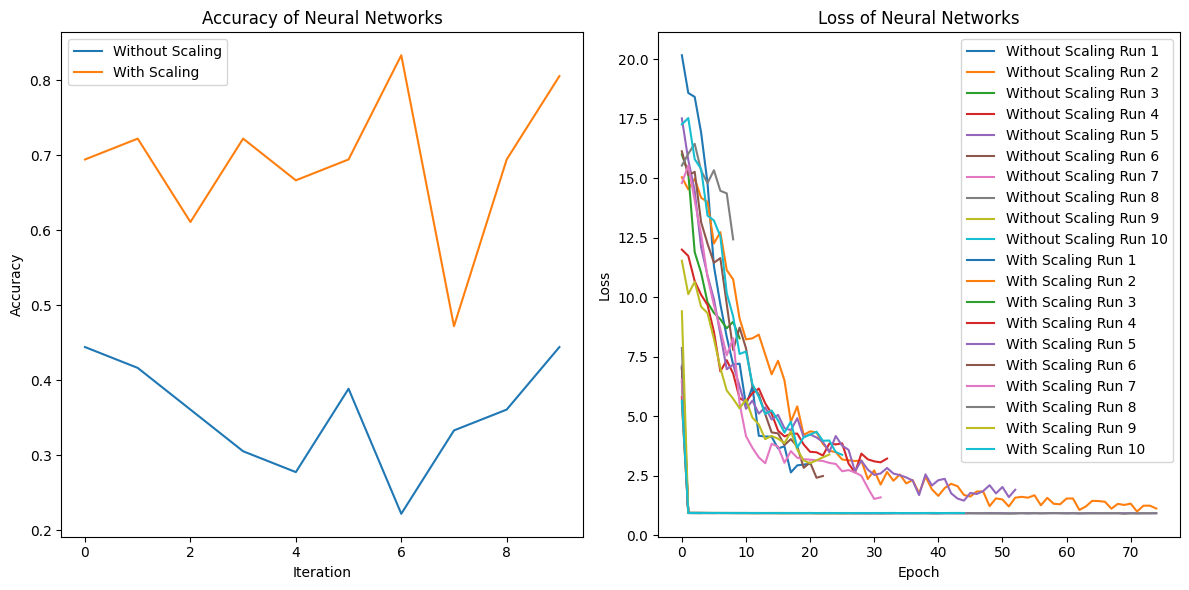

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

data_wine = pd.read_csv("wine.csv", skiprows=[1]).to_numpy()
features = data_wine[:, :-1]
labels = data_wine[:, -1:]

neurons = [26, 10]
accuracies_nn1 = []
accuracies_nn2 = []
accuracies_sk_nn1 = []
accuracies_sk_nn2 = []
losses_nn1 = []
losses_nn2 = []
RUNS = 10

# TODO: Do the above at least 3 times
# NOTE: Use loops here!
for _ in range(RUNS):
    # TODO: Set up the data and split it into train and test-sets.
    # TODO: Train and test your neural networks.
    # NOTE: Use the same train/test split for both neural network models!
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=0.8, shuffle=True
    )

    # Change labels to be 0 indexed
    y_train = y_train - 1
    y_test = y_test - 1

    scaler = preprocessing.StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.fit_transform(X_test)

    input_dim = X_train.shape[1]
    output_dim = len(np.unique(y_train))

    nn1 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")
    nn2 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

    print("Neural Net 1:")
    loss_1, _ = nn1.train_net(
        X_train,
        y_train,
        batch_size=16,
        epochs=75,
        learning_rate=0.01,
        use_validation_data=True,
        early_stopping=3,
    )
    losses_nn1.append(loss_1)

    print("Neural Net 2:")
    loss_2, _ = nn2.train_net(
        X_train_norm,
        y_train,
        batch_size=16,
        epochs=75,
        use_validation_data=True,
        early_stopping=3,
        learning_rate=0.001
    )
    losses_nn2.append(loss_2)

    y_pred = nn1.forward(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy_nn1 = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
    print("Accuracy Neural Net 1:", accuracy_nn1)
    accuracies_nn1.append(accuracy_nn1)

    y_pred_norm = nn2.forward(X_test_norm)
    y_pred_norm = np.argmax(y_pred_norm, axis=1)
    accuracy_nn2 = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred_norm)
    print("Accuracy Neural Net 2:", accuracy_nn2)
    accuracies_nn2.append(accuracy_nn2)

    mlp = MLPClassifier(hidden_layer_sizes=(26, 10), max_iter=75)
    mlp.fit(X_train, y_train.ravel())

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test.ravel(), y_pred)
    print("Accuracy of sklearn's MLPClassifier:", accuracy)
    accuracies_sk_nn1.append(accuracy)

    mlp_norm = MLPClassifier(hidden_layer_sizes=(26, 10), max_iter=75)
    mlp_norm.fit(X_train_norm, y_train.ravel())

    y_pred_norm = mlp_norm.predict(X_test_norm)
    accuracy_norm = accuracy_score(y_test.ravel(), y_pred_norm)
    print("Accuracy of sklearn's MLPClassifier with normalized data:", accuracy_norm)
    accuracies_sk_nn2.append(accuracy_norm)

print("Mean Accuracy Neural Net 1:", np.mean(accuracies_nn1))
print("Mean Accuracy Neural Net 2:", np.mean(accuracies_nn2))
print("Mean Accuracy Sklearn Neural Net 1:", np.mean(accuracies_sk_nn1))
print("Mean Accuracy Sklearn Neural Net 2:", np.mean(accuracies_sk_nn2))

# TODO: Plot the results with matplotlib (plt)
# NOTE: One combined lineplot with the scaling and one without the scaling, 2 plots in total.
# NOTE: Plot both the accuracy and the loss!
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracies_nn1, label="Without Scaling")
plt.plot(accuracies_nn2, label="With Scaling")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Networks")
plt.legend()

plt.subplot(1, 2, 2)
for i, loss in enumerate(losses_nn1):
    plt.plot(loss, label=f"Without Scaling Run {i+1}")
for i, loss in enumerate(losses_nn2):
    plt.plot(loss, label=f"With Scaling Run {i+1}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Networks")
plt.legend()

plt.tight_layout()
plt.show()

### Real data and hyper-parameter tuning

Now we are going to use real data, preprocess it, and do hyper-parameter tuning.

Choose two hyper-parameters to tune to try and achive an even better result.

**NOTE:** Changing the number of epochs should be part of the tuning, but it does not count towards the two hyper parameters.

### 9) Dataset 2: Mushroom

Mushroom dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Note: This dataset has one feature with missing values. Remove this feature.

/home/joel/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


My Neural Net:
Epoch 1 - Loss: 0.6591000917254377
Epoch 2 - Loss: 0.027917714809494898
Epoch 3 - Loss: 0.014857851718312215
Epoch 4 - Loss: 0.0
Epoch 5 - Loss: 0.0
Epoch 6 - Loss: 0.0
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy My Neural Net: 0.9993846153846154
Accuracy of sklearn's MLPClassifier: 1.0


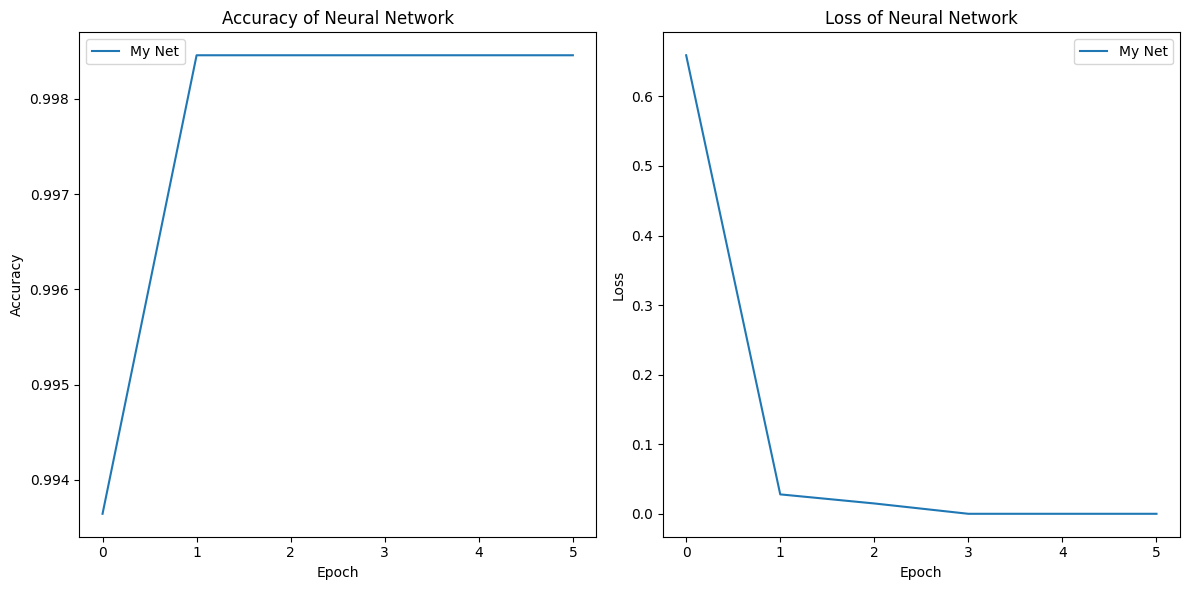

In [30]:
# TODO: Preprocess the data.
data_mushroom = (
    pd.read_csv("mushroom.csv", delimiter=",", na_values='?').dropna(axis=1).to_numpy()
)

features = data_mushroom[:, 1:]
labels = data_mushroom[:, 0:1]

enc = preprocessing.OneHotEncoder(sparse_output=False)
enc_features = enc.fit_transform(features)

label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = encoded_labels.reshape(-1, 1)

# TODO: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    enc_features, encoded_labels, train_size=0.8, shuffle=True
)
# TODO: Train a neural network on the data
neurons = [124, 50]
accuracies_nn = []
accuracies_sk_nn = []
losses_sk_nn = []

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

nn = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

print("My Neural Net:")
my_loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=8,
    epochs=75,
    learning_rate=0.01,
    use_validation_data=True,
    early_stopping=3,
)

y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_nn = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
print("Accuracy My Neural Net:", accuracy_nn)
accuracies_nn.append(accuracy_nn)

mlp = MLPClassifier(hidden_layer_sizes=(21, 10), max_iter=75)
mlp.fit(X_train, y_train.ravel())

y_pred = mlp.predict(X_test)
accuracy_sk = accuracy_score(y_test.ravel(), y_pred)
print("Accuracy of sklearn's MLPClassifier:", accuracy_sk)

# TODO: Visualize the loss for each epoch
# TODO: Visualize the test accuracy for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_loss, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: Batch Size
* Parameter 2: Learning Rate

* Neural network sizes: [124, 50]

Epoch 1 - Loss: 1.1731203810931128
Epoch 2 - Loss: 0.6908429767512385
Epoch 3 - Loss: 0.6930695131475321
Epoch 4 - Loss: 0.6929445009697446
Epoch 5 - Loss: 0.6924036052008864
Epoch 6 - Loss: 0.692817106792503
Epoch 7 - Loss: 0.6920146534454833
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.1
Accuracy: 0.5243076923076923
Epoch 1 - Loss: 0.5351076029741205
Epoch 2 - Loss: 0.01491087169518073
Epoch 3 - Loss: 0.02157056336696942
Epoch 4 - Loss: 0.0
Epoch 5 - Loss: 0.0
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.01
Accuracy: 1.0
Epoch 1 - Loss: 1.6823409452198874
Epoch 2 - Loss: 0.3640246929079447
Epoch 3 - Loss: 0.21356738973149006
Epoch 4 - Loss: 0.14119688844967196
Epoch 5 - Loss: 0.08331791856534465
Epoch 6 - Loss: 0.059290884976529984
Epoch 7 - Loss: 0.028816055152188224
Epoch 8 - Loss: 7.946518177461669e-05
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Si

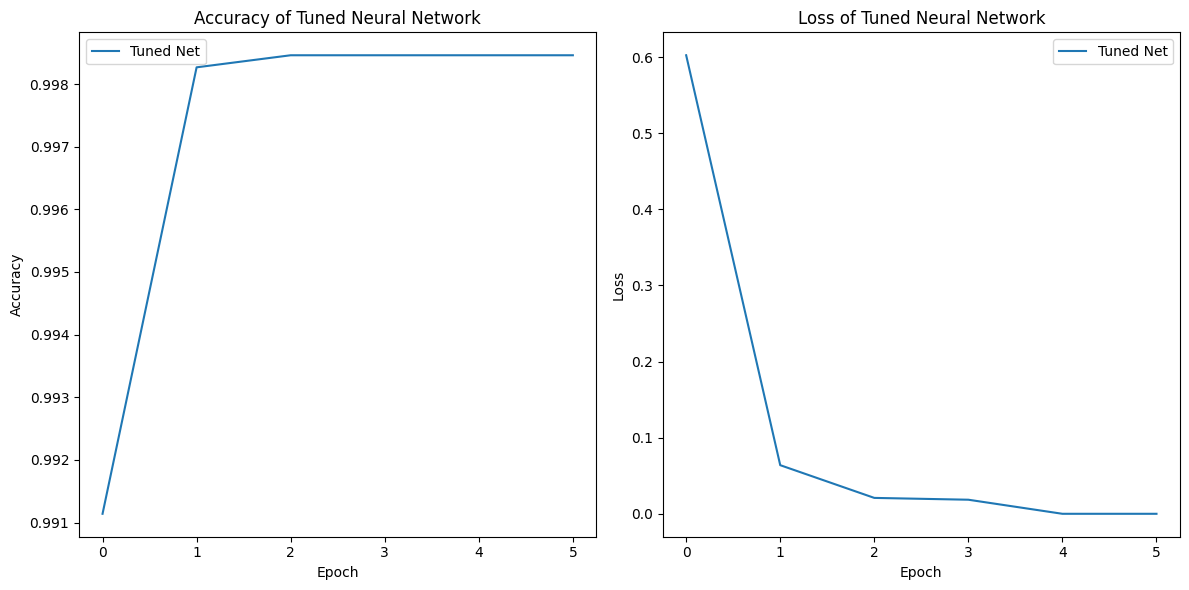

In [23]:
# TODO: Hyper-parameter tuning
params = {
    "Batch Size": [8, 16, 32, 64],
    "Learning Rate": [0.1, 0.01, 0.001, 0.0001],
}

best_params = {
    "Batch Size": [],
    "Learning Rate": [],
    "Accuracy": [],
}

for batch_size in params["Batch Size"]:
    for learning_rate in params["Learning Rate"]:
        nn = NeuralNet(
            input_dim=input_dim,
            output_dim=output_dim,
            neurons=neurons,
            loss_function="SCE",
            output_activation="Softmax",
        )
        _, _ = nn.train_net(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=75,
            learning_rate=learning_rate,
            use_validation_data=True,
            early_stopping=3,
        )
        y_pred = nn.forward(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
        print("Batch Size:", batch_size)
        print("Learning Rate:", learning_rate)
        print("Accuracy:", accuracy)

        best_params["Batch Size"].append(batch_size)
        best_params["Learning Rate"].append(learning_rate)
        best_params["Accuracy"].append(accuracy)

best_accuracy = max(best_params["Accuracy"])
best_index = best_params["Accuracy"].index(best_accuracy)

print("Best Parameter Values:")
print("Best Batch Size:", best_params["Batch Size"][best_index])
print("Best Learning Rate:", best_params["Learning Rate"][best_index])
print("Best Accuracy:", best_accuracy)

print("Hyper-Parameter Tuned Neural Net:")
nn = NeuralNet(
    input_dim=input_dim,
    output_dim=output_dim,
    neurons=neurons,
    loss_function="SCE",
    output_activation="Softmax",
)
loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=best_params["Batch Size"][best_index],
    epochs=75,
    learning_rate=best_params["Learning Rate"][best_index],
    use_validation_data=True,
    early_stopping=3,
)
y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_true=y_test.ravel(), y_pred=y_pred))

# TODO: Visualize the loss after hyper-parameter tuning for each epoch
# TODO: Visualize the test accuracy after hyper-parameter tuning for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Tuned Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Tuned Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

### 10) Dataset 3: Adult

Adult dataset: https://archive.ics.uci.edu/dataset/2/adult

**IMPORTANT NOTE:** This dataset is much larger than the previous two (48843 instances). If your code runs slow on your own computer, you may exclude parts of this dataset, but you must keep a minimum of 10000 datapoints.

My Neural Net:
Epoch 1 - Loss: 0.8001933869148414
Epoch 2 - Loss: 0.5516682141192493
Epoch 3 - Loss: 0.5514597096799811
Epoch 4 - Loss: 0.551765711441401
Epoch 5 - Loss: 0.5516872170312351
Epoch 6 - Loss: 0.5513655987414597
Epoch 7 - Loss: 0.5516214744132993
Epoch 8 - Loss: 0.551854852902916
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Accuracy My Neural Net: 0.7621046166444877
Accuracy of sklearn's MLPClassifier: 0.8542327771522162


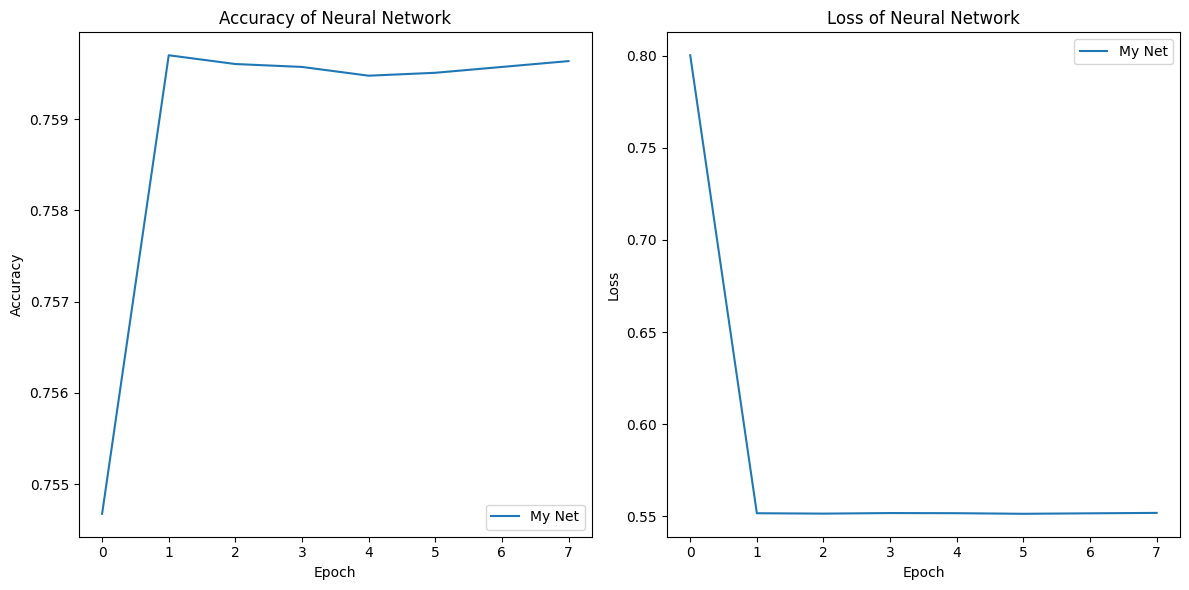

In [33]:
from sklearn.compose import ColumnTransformer
data_adult = (
    pd.read_csv("adult.csv")
    .drop(columns=["fnlwgt", "education"])
)  # TODO: Read the data.

# TODO: Preprocess the data.
ct = ColumnTransformer(
	transformers=[("onehot", preprocessing.OneHotEncoder(sparse_output=False), ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"])],
	remainder="passthrough"
)
enc_features = ct.fit_transform(data_adult.drop(columns=["income"]))

label_encoder = preprocessing.LabelEncoder() 
enc_labels = label_encoder.fit_transform(data_adult["income"]).reshape(-1, 1)

# TODO: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    enc_features, enc_labels, train_size=0.8, shuffle=True
)

neurons = [100, 50]
accuracies_nn = []
accuracies_sk_nn = []
losses_sk_nn = []

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

nn = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons, loss_function="SCE", output_activation="Softmax")

# TODO: Train a neural network on the data
print("My Neural Net:")
my_loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=32,
    epochs=75,
	learning_rate=0.001,
    use_validation_data=True,
    early_stopping=3,
)

y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_nn = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
print("Accuracy My Neural Net:", accuracy_nn)
accuracies_nn.append(accuracy_nn)

mlp = MLPClassifier(hidden_layer_sizes=(21, 10), max_iter=75)
mlp.fit(X_train, y_train.ravel())

y_pred = mlp.predict(X_test)
accuracy_sk = accuracy_score(y_test.ravel(), y_pred)
print("Accuracy of sklearn's MLPClassifier:", accuracy_sk)

# TODO: Visualize the loss for each epoch
# TODO: Visualize the test accuracy for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_loss, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: Batch Size
* Parameter 2: Learning Rate

* Neural network sizes: neurons = [100, 50]

Epoch 1 - Loss: 0.6105036101017267
Epoch 2 - Loss: 0.5518329149478074
Epoch 3 - Loss: 0.5517616391537553
Epoch 4 - Loss: 0.5519544541957727
Epoch 5 - Loss: 0.551777338370299
Epoch 6 - Loss: 0.55197966445878
Epoch 7 - Loss: 0.5516693143557374
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.1
Accuracy: 0.7590336779608967
Epoch 1 - Loss: 0.5981026647592249
Epoch 2 - Loss: 0.550892966067522
Epoch 3 - Loss: 0.550905094230506
Epoch 4 - Loss: 0.5508718487110532
### EARLY STOP - Validation loss did not improve for 3 epochs! ###
Batch Size: 8
Learning Rate: 0.01
Accuracy: 0.7590336779608967
Epoch 1 - Loss: 0.6538787421003546
Epoch 2 - Loss: 0.5520169725427106
Epoch 3 - Loss: 0.5506770151153182
Epoch 4 - Loss: 0.5505518031748029
Epoch 5 - Loss: 0.5505329428451833
Epoch 6 - Loss: 0.5504977384053501
Epoch 7 - Loss: 0.5505001030485792
Epoch 8 - Loss: 0.5505401577857714
Epoch 9 - Loss: 0.5505341925123078
Epoch 10 - Loss: 0.5505389110544134
### EARLY 

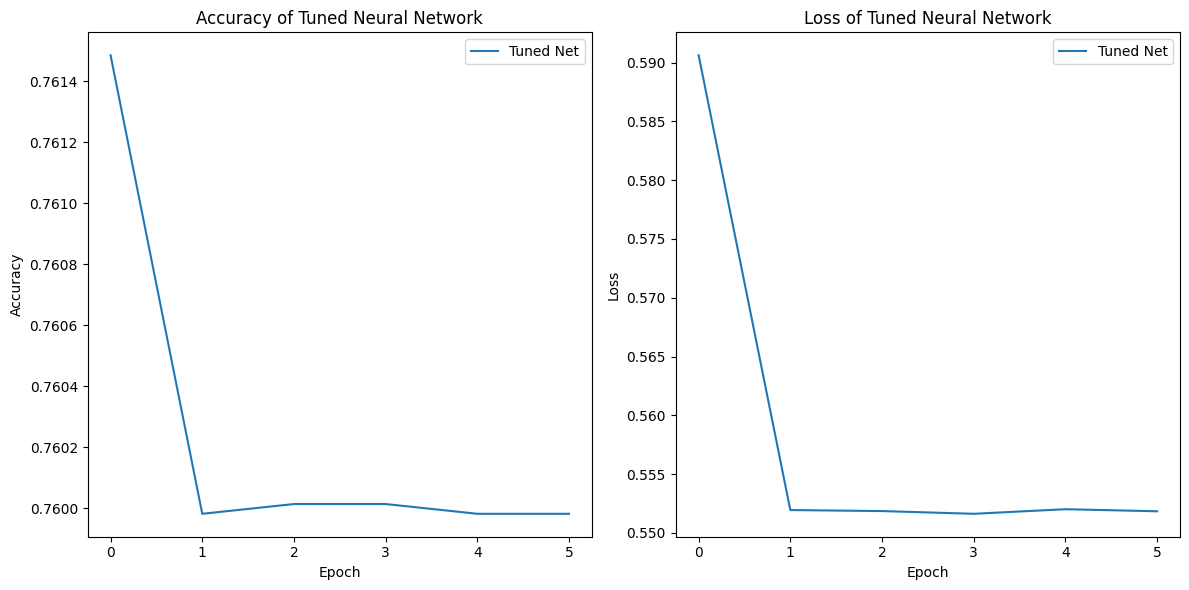

In [29]:
# TODO: Hyper-parameter tuning
params = {
    "Batch Size": [8, 16, 32, 64],
    "Learning Rate": [0.1, 0.01, 0.001, 0.0001],
}

best_params = {
    "Batch Size": [],
    "Learning Rate": [],
    "Accuracy": [],
}

for batch_size in params["Batch Size"]:
    for learning_rate in params["Learning Rate"]:
        nn = NeuralNet(
            input_dim=input_dim,
            output_dim=output_dim,
            neurons=neurons,
            loss_function="SCE",
            output_activation="Softmax",
        )
        _, _ = nn.train_net(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=75,
            learning_rate=learning_rate,
            use_validation_data=True,
            early_stopping=3,
        )
        y_pred = nn.forward(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_true=y_test.ravel(), y_pred=y_pred)
        print("Batch Size:", batch_size)
        print("Learning Rate:", learning_rate)
        print("Accuracy:", accuracy)

        best_params["Batch Size"].append(batch_size)
        best_params["Learning Rate"].append(learning_rate)
        best_params["Accuracy"].append(accuracy)

best_accuracy = max(best_params["Accuracy"])
best_index = best_params["Accuracy"].index(best_accuracy)

print("Best Parameter Values:")
print("Best Batch Size:", best_params["Batch Size"][best_index])
print("Best Learning Rate:", best_params["Learning Rate"][best_index])
print("Best Accuracy:", best_accuracy)

print("Hyper-Parameter Tuned Neural Net:")
nn = NeuralNet(
    input_dim=input_dim,
    output_dim=output_dim,
    neurons=neurons,
    loss_function="SCE",
    output_activation="Softmax",
)
loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=best_params["Batch Size"][best_index],
    epochs=75,
    learning_rate=best_params["Learning Rate"][best_index],
    use_validation_data=True,
    early_stopping=3,
)
y_pred = nn.forward(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_true=y_test.ravel(), y_pred=y_pred))

# TODO: Visualize the loss after hyper-parameter tuning for each epoch
# TODO: Visualize the test accuracy after hyper-parameter tuning for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_accuracies, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Tuned Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label="Tuned Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Tuned Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why would we want to use different activation functions?

2) Why would we want to use different loss functions?

3) Why are neural networks sensitive to large input values?

4) What is the role of the bias? 

5) What is the purpose of hyper-parameter tuning?

6) A small example neural network will be shown during the oral examination. You will be asked a few basic questions related to the number of weights, biases, inputs and outputs.

# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!